In [18]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
%matplotlib inline

Matplotlib created a temporary config/cache directory at /tmp/matplotlib-9wzd0158 because the default path (/home/mosaic-ai/.config/matplotlib) is not a writable directory; it is highly recommended to set the MPLCONFIGDIR environment variable to a writable directory, in particular to speed up the import of Matplotlib and to better support multiprocessing.


In [25]:
from statsmodels.tsa.stattools import adfuller

ModuleNotFoundError: No module named 'statsmodels'

In [4]:
df = pd.read_csv("/data/BreadBasket_DMS.csv")
df.head()

,Date,Time,Transaction,Item
0,2016-10-30,09:58:11,1,Bread
1,2016-10-30,10:05:34,2,Scandinavian
2,2016-10-30,10:05:34,2,Scandinavian
3,2016-10-30,10:07:57,3,Hot chocolate
4,2016-10-30,10:07:57,3,Jam


In [5]:
df = df.query("Item!='NONE'")

In [6]:
df.info()
df["Qty"]=1

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20507 entries, 0 to 21292
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Date         20507 non-null  object
 1   Time         20507 non-null  object
 2   Transaction  20507 non-null  int64 
 3   Item         20507 non-null  object
dtypes: int64(1), object(3)
memory usage: 801.1+ KB


In [7]:
daily_items = df.groupby(["Date","Item"])["Qty"].sum().reset_index()

In [8]:
#Filtering Top 3 product
top_items = daily_items.groupby("Item")["Qty"].sum().sort_values(ascending=False)[0:3].index
top_items

Index(['Coffee', 'Bread', 'Tea'], dtype='object', name='Item')

In [9]:
top_daily_items = daily_items[daily_items["Item"].isin(top_items)]
top_daily_items

,Date,Item,Qty
1,2016-10-30,Bread,29
4,2016-10-30,Coffee,33
24,2016-10-30,Tea,12
26,2016-10-31,Bread,24
28,2016-10-31,Coffee,60
...,...,...,...
3612,2017-04-08,Coffee,41
3633,2017-04-08,Tea,9
3639,2017-04-09,Bread,9
3642,2017-04-09,Coffee,17


In [10]:
top_daily_items = top_daily_items.sort_values(by=["Item","Date"])
top_daily_items

,Date,Item,Qty
1,2016-10-30,Bread,29
26,2016-10-31,Bread,24
50,2016-11-01,Bread,21
73,2016-11-02,Bread,17
95,2016-11-03,Bread,26
...,...,...,...
3554,2017-04-05,Tea,14
3578,2017-04-06,Tea,11
3599,2017-04-07,Tea,6
3633,2017-04-08,Tea,9


In [11]:
top_daily_items["Date"] = pd.to_datetime(top_daily_items["Date"])
top_daily_items.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 475 entries, 1 to 3658
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    475 non-null    datetime64[ns]
 1   Item    475 non-null    object        
 2   Qty     475 non-null    int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 14.8+ KB


In [19]:
df_coffee = top_daily_items[top_daily_items['Item'] == "Coffee"]
df_tea = top_daily_items[top_daily_items['Item'] == "Tea"]
df_bread = top_daily_items[top_daily_items['Item'] == "Bread"]

In [20]:
df_coffee.shape, df_tea.shape, df_bread.shape

((158, 3), (158, 3), (159, 3))

In [21]:
df_coffee = df_coffee[['Date','Qty']]
df_tea = df_tea[['Date','Qty']]
df_bread = df_bread[['Date','Qty']]

In [22]:
df_coffee.set_index('Date', inplace=True)
df_tea.set_index('Date', inplace=True)
df_bread.set_index('Date', inplace=True)

<AxesSubplot:xlabel='Date'>

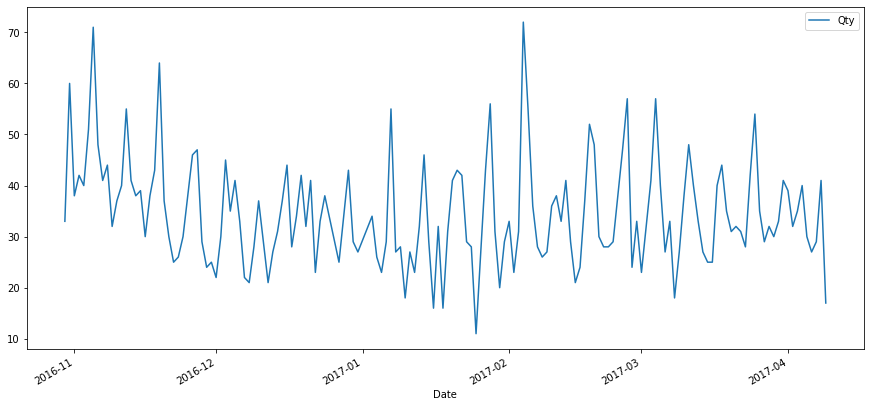

In [24]:
from pylab import rcParams
rcParams['figure.figsize'] = 15, 7
df_coffee.plot()